In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Read and merge csv files
red_wine_df = pd.read_csv("winequality-red.csv", sep=";")
white_wine_df = pd.read_csv("winequality-white.csv", sep=";")

wine_df = pd.concat([red_wine_df, white_wine_df])

# Show dataframe
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Neural Network Deep Learning Model

In [4]:
# split data into features and target array
y = wine_df["quality"].values
X = wine_df.drop(["quality"], axis=1)

# split data into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [5]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 634 (2.48 KB)

 Trainable params: 634 (2.48 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model
nn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

# convert y_train to categorical
y_train_categorical = tf.keras.utils.to_categorical(y_train)
y_test_categorical = tf.keras.utils.to_categorical(y_test)

In [8]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train_categorical ,epochs=50)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1345 - loss: 2.3337
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 1.3998
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5302 - loss: 1.1719
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5372 - loss: 1.1241
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5565 - loss: 1.0906
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5558 - loss: 1.0780
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5635 - loss: 1.0623
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5427 - loss: 1.0795
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5449 - loss: 1.0684
Epoch 10/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5645 - loss: 1.0485
Epoch 11/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5601 - loss: 1.0664
Epoch 12/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [9]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test_categorical,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 0s - 5ms/step - accuracy: 0.5563 - loss: 1.0374
Loss: 1.0374460220336914, Accuracy: 0.5563076734542847


# Random Forest Model

In [10]:
# import dependacies
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
print("Confusion Matrix")
display(cm)

Confusion Matrix


array([[  0,   0,   3,   4,   1,   0,   0],
       [  0,   7,  22,  24,   1,   0,   0],
       [  0,   1, 384, 147,   3,   0,   0],
       [  0,   2,  95, 557,  55,   0,   0],
       [  0,   0,   4, 111, 155,   0,   0],
       [  0,   0,   1,  13,  17,  17,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

In [15]:
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.6892307692307692
Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.70      0.13      0.22        54
           5       0.75      0.72      0.74       535
           6       0.65      0.79      0.71       709
           7       0.67      0.57      0.62       270
           8       1.00      0.35      0.52        48
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1625
   macro avg       0.54      0.37      0.40      1625
weighted avg       0.70      0.69      0.68      1625



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.12177642918100968, 'alcohol'),
 (0.1020691970542475, 'volatile acidity'),
 (0.10197092637526455, 'density'),
 (0.09138421819662025, 'total sulfur dioxide'),
 (0.0871156331098126, 'sulphates'),
 (0.08668315038323986, 'chlorides'),
 (0.08559567635442743, 'free sulfur dioxide'),
 (0.08540171001380827, 'residual sugar'),
 (0.08414909786324509, 'pH'),
 (0.07802584168681032, 'citric acid'),
 (0.0758281197815144, 'fixed acidity')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

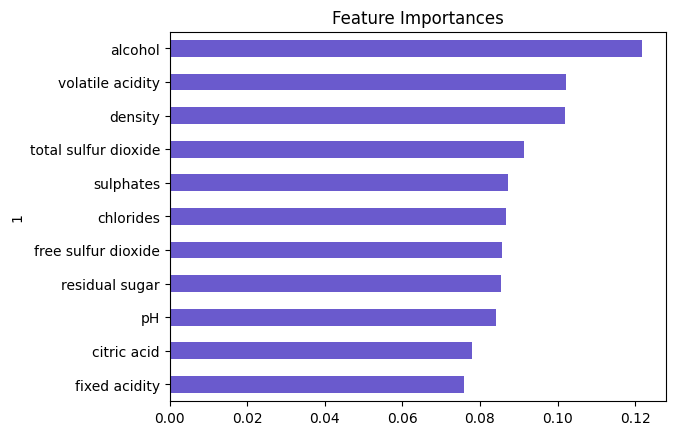

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='slateblue', title= 'Feature Importances', legend=False)